# 서울시 지하철 승하차 데이터 분석(2025.01 ~ 2025.02)

## 데이터 불러오기

In [56]:
import pandas as pd

subway_1 = pd.read_csv('data/CARD_SUBWAY_MONTH_202501.csv', encoding = 'utf-8')
subway_2 = pd.read_csv('data/CARD_SUBWAY_MONTH_202502.csv', encoding = 'cp949')

col = ['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자']

subway_1.reset_index(inplace = True)
subway_1 = subway_1.dropna(axis = 1)
subway_1.columns = col
print(subway_1)
print(subway_2)

           사용일자  노선명           역명  승차총승객수  하차총승객수      등록일자
0      20250101  수인선           송도    1453    1321  20250104
1      20250101  4호선           창동   12477   13408  20250104
2      20250101  4호선           쌍문   12792   12199  20250104
3      20250101  4호선     수유(강북구청)   17606   17442  20250104
4      20250101  4호선  미아(서울사이버대학)    6819    6532  20250104
...         ...  ...          ...     ...     ...       ...
19124  20250131  수인선      남동인더스파크    1622    1748  20250203
19125  20250131  수인선          원인재    3834    3942  20250203
19126  20250131  수인선           연수    4170    4016  20250203
19127  20250131  수인선           송도    2076    1848  20250203
19128  20250131  수인선          인하대    5245    4854  20250203

[19129 rows x 6 columns]
           사용일자  노선명    역명  승차총승객수  하차총승객수      등록일자
0      20250201  1호선   서울역   56802   45819  20250204
1      20250201  1호선    시청   31681   29724  20250204
2      20250201  1호선    종각   27189   25388  20250204
3      20250201  1호선  종로3가   25776   23449

## 데이터 합치기
- 데이터를 합치고 불필요한 컬럼인 등록일자 제거

In [57]:
subway = pd.concat([subway_1, subway_2])
# print(subway)
subway = subway.drop('등록일자', axis = 1)
subway = subway.reset_index(drop = True)
print(subway)

           사용일자  노선명           역명  승차총승객수  하차총승객수
0      20250101  수인선           송도    1453    1321
1      20250101  4호선           창동   12477   13408
2      20250101  4호선           쌍문   12792   12199
3      20250101  4호선     수유(강북구청)   17606   17442
4      20250101  4호선  미아(서울사이버대학)    6819    6532
...         ...  ...          ...     ...     ...
36401  20250228  중앙선           오빈     331     326
36402  20250228  중앙선           양평    4343    4656
36403  20250228  중앙선           원덕     370     345
36404  20250228  중앙선           용문    1913    2192
36405  20250228  중앙선           지평      52      72

[36406 rows x 5 columns]


## 데이터 변수 추가
- 사용일자를 통해 요일 컬럼 추가

In [58]:
# subway 데이터의 타입 및 결측값 확인
print(subway.info())
print(subway.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36406 entries, 0 to 36405
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    36406 non-null  int64 
 1   노선명     36406 non-null  object
 2   역명      36406 non-null  object
 3   승차총승객수  36406 non-null  int64 
 4   하차총승객수  36406 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.4+ MB
None
사용일자      0
노선명       0
역명        0
승차총승객수    0
하차총승객수    0
dtype: int64


In [59]:
# 먼저 사용일자를 datetime으로 변환
subway['사용일자'] = pd.to_datetime(subway['사용일자'].astype(str), format = '%Y%m%d')
print(subway.info())
print(subway)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36406 entries, 0 to 36405
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용일자    36406 non-null  datetime64[ns]
 1   노선명     36406 non-null  object        
 2   역명      36406 non-null  object        
 3   승차총승객수  36406 non-null  int64         
 4   하차총승객수  36406 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.4+ MB
None
            사용일자  노선명           역명  승차총승객수  하차총승객수
0     2025-01-01  수인선           송도    1453    1321
1     2025-01-01  4호선           창동   12477   13408
2     2025-01-01  4호선           쌍문   12792   12199
3     2025-01-01  4호선     수유(강북구청)   17606   17442
4     2025-01-01  4호선  미아(서울사이버대학)    6819    6532
...          ...  ...          ...     ...     ...
36401 2025-02-28  중앙선           오빈     331     326
36402 2025-02-28  중앙선           양평    4343    4656
36403 2025-02-28  중앙선           원덕     370     345


In [62]:
# 요일 컬럼 추가
subway['요일'] = subway['사용일자'].dt.dayofweek

w_map = {0 : '월요일', 1 : '화요일', 2 : '수요일', 3 : '목요일', 4 : '금요일', 5 : '토요일', 6 : '일요일'}
subway['요일'] = subway['요일'].map(w_map)
print(subway)

            사용일자  노선명           역명  승차총승객수  하차총승객수   요일
0     2025-01-01  수인선           송도    1453    1321  수요일
1     2025-01-01  4호선           창동   12477   13408  수요일
2     2025-01-01  4호선           쌍문   12792   12199  수요일
3     2025-01-01  4호선     수유(강북구청)   17606   17442  수요일
4     2025-01-01  4호선  미아(서울사이버대학)    6819    6532  수요일
...          ...  ...          ...     ...     ...  ...
36401 2025-02-28  중앙선           오빈     331     326  금요일
36402 2025-02-28  중앙선           양평    4343    4656  금요일
36403 2025-02-28  중앙선           원덕     370     345  금요일
36404 2025-02-28  중앙선           용문    1913    2192  금요일
36405 2025-02-28  중앙선           지평      52      72  금요일

[36406 rows x 6 columns]


In [63]:
# 총 승객수 컬럼 추가
subway['총승객수'] = subway['승차총승객수'] + subway['하차총승객수']
print(subway)

            사용일자  노선명           역명  승차총승객수  하차총승객수   요일   총승객수
0     2025-01-01  수인선           송도    1453    1321  수요일   2774
1     2025-01-01  4호선           창동   12477   13408  수요일  25885
2     2025-01-01  4호선           쌍문   12792   12199  수요일  24991
3     2025-01-01  4호선     수유(강북구청)   17606   17442  수요일  35048
4     2025-01-01  4호선  미아(서울사이버대학)    6819    6532  수요일  13351
...          ...  ...          ...     ...     ...  ...    ...
36401 2025-02-28  중앙선           오빈     331     326  금요일    657
36402 2025-02-28  중앙선           양평    4343    4656  금요일   8999
36403 2025-02-28  중앙선           원덕     370     345  금요일    715
36404 2025-02-28  중앙선           용문    1913    2192  금요일   4105
36405 2025-02-28  중앙선           지평      52      72  금요일    124

[36406 rows x 7 columns]


## 요일별 총 승객수 분석

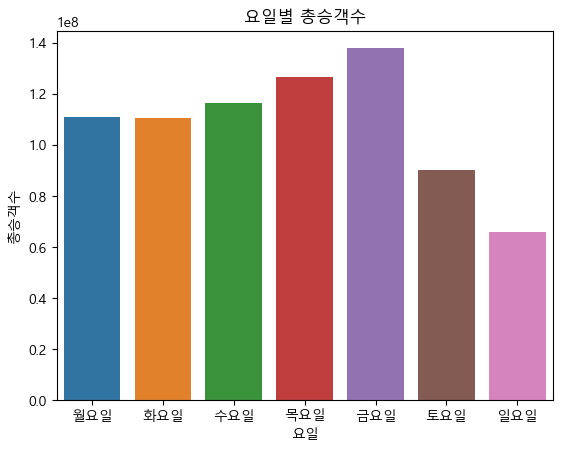

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

df_week = subway.groupby('요일')['총승객수'].sum().reset_index()

sns.barplot(x = '요일', y = '총승객수', data = df_week, order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])
plt.title('요일별 총승객수')
plt.show()

## 노선별 총승객수 분석

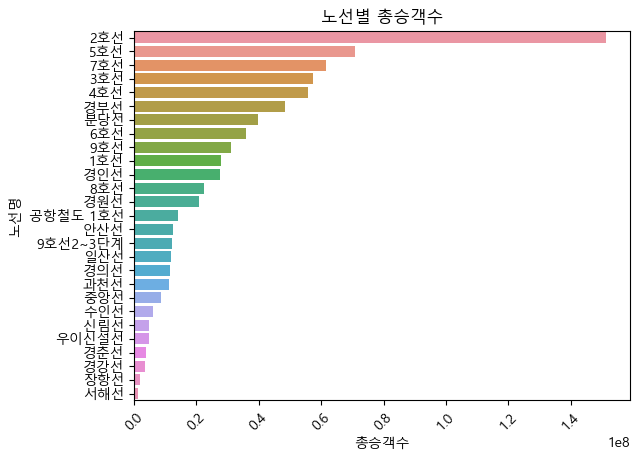

In [78]:
df = subway.groupby('노선명')['총승객수'].sum().reset_index()
df = df.sort_values('총승객수', ascending = False)
sns.barplot(y = '노선명', x = '총승객수' , data = df)
plt.title('노선별 총승객수')
plt.xticks(rotation = 45)
plt.show()


## 역별 총승객수 상위 10개

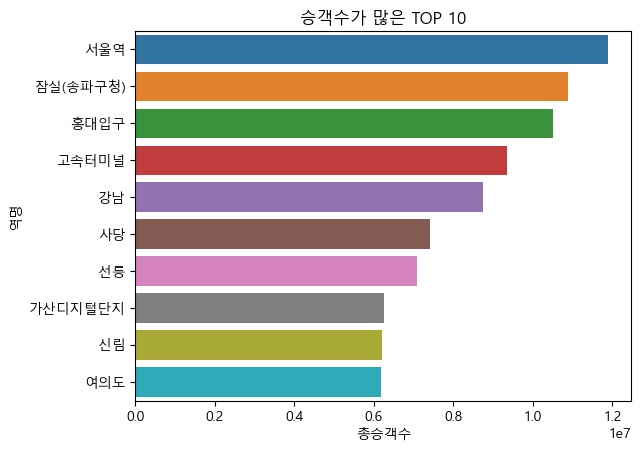

In [80]:
top10 = subway.groupby('역명')['총승객수'].sum().sort_values(ascending = False).head(10).reset_index()

sns.barplot(y = '역명', x = '총승객수', data = top10)
plt.title('승객수가 많은 TOP 10')
plt.show()

# 예상외로 1위가 서울역?

## 시간 흐름에 따른 승객수 추이

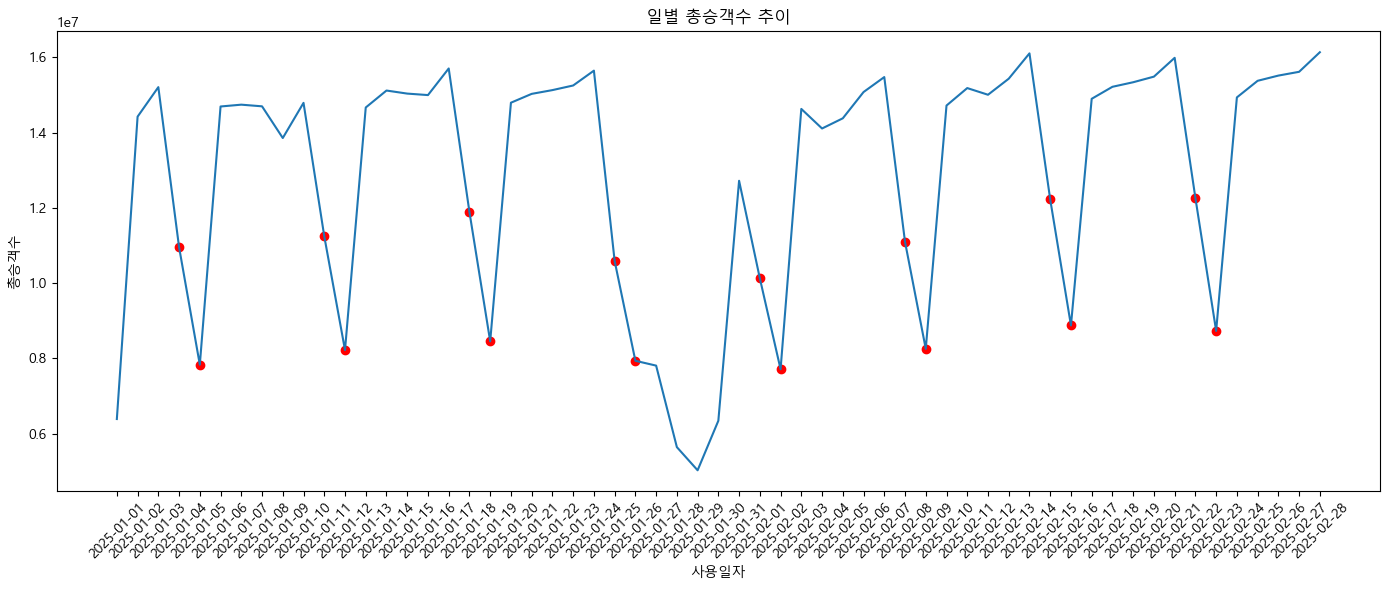

In [84]:
df_daily = subway.groupby('사용일자')['총승객수'].sum().reset_index()
weekend = df_daily[df_daily['사용일자'].dt.weekday >= 5]

plt.figure(figsize=(14, 6))
sns.lineplot(x = '사용일자', y = '총승객수', data = df_daily)

# 주말에 빨간점 표시
plt.scatter(weekend['사용일자'], weekend['총승객수'], color = 'red')

plt.title('일별 총승객수 추이')
plt.xticks(ticks = df_daily['사용일자'], rotation = 45)
plt.tight_layout()
plt.show()

# 전체 적으로 봤을 때 요일 별 승객수 변화와 다른 점이 없다
# 최하인 부분을 확인해 보면 2025년 1월 28일로 설연휴 이다.
# 3월에도 같은 추세를 보일 가능성이 높다고 판단된다.